I will be performing logistic regression on a credit card dataset which shows bona fide and fraudulent transactions. The data is taken from a page on Kaggle, the authors of which have given the data of credit card transactions from September 2013 by European cardholders.

In [1]:
#Importing all the libraries required.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
#Loading the dataset into the notebook.
creditcard = pd.read_csv(r"/content/drive/MyDrive/IBM/Resources/creditcard.csv")

In [6]:
#Looking at the first 5 columns of the dataset.
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#Looking at the last 5 columns of the dataset.
creditcard.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
#Looking at the information regarding the dataset.
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
#Seeing how many NaN (null) values are there in this dataset.
creditcard.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
#Checking the distribution of bona fide and fraudulent transactions.
creditcard['Class'].value_counts()

,count
Class,
0,284315
1,492


This dataset is highly unbalanced, as the bona fide transactions (0) highly outnumbers the fraudulent transactions (1).

In [11]:
#Separating the dataset into bona fide and fraudulent.
bona_fide = creditcard[creditcard.Class == 0]
fraud = creditcard[creditcard.Class == 1]

In [12]:
print(bona_fide.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
#I will now be taking 492 sample transactions out of the bona fide transactions to help balance the data.
bonafide_sample = bona_fide.sample(n=492)

In [14]:
#I will now concatenate both the bona fide sample and the fraudulent datasets into one new dataset.
creditcard_new = pd.concat([bonafide_sample, fraud], axis = 0)

In [15]:
#Observing first 5 columns of the new dataset.
creditcard_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
108234,70821.0,1.207969,0.061912,0.600384,0.360026,-0.586984,-0.680795,-0.087181,-0.067091,0.075261,...,-0.178548,-0.402041,0.072883,0.581511,0.287083,0.414268,-0.042747,0.002932,1.33,0
50777,44647.0,1.077812,0.369748,0.699493,2.258038,0.033918,0.488509,-0.161018,0.277143,-0.805675,...,-0.237509,-0.853316,0.160163,-0.385824,0.073197,-0.295429,0.001965,0.016467,22.06,0
19008,29949.0,-1.275605,-0.006608,0.820420,-1.803384,-0.223700,-0.508797,0.288672,-0.920977,-1.403613,...,0.975924,0.669125,0.264246,0.034623,0.167380,-0.272103,0.424898,0.087397,84.75,0
273162,165452.0,2.126671,-0.048476,-1.532609,0.123164,0.519258,-0.354793,0.137608,-0.213290,0.519808,...,-0.340084,-0.861138,0.279089,0.041564,-0.165836,0.206916,-0.073992,-0.059721,1.29,0
122172,76460.0,-0.805455,0.347791,2.056077,-0.535907,0.955456,2.492291,-0.264383,0.780913,0.289018,...,-0.091290,-0.098631,-0.086552,3.265103,0.161164,0.206716,0.115108,-0.069451,8.44,0


In [16]:
#Checking how many fraud and bona fide transactions there are in the new dataset.
creditcard_new['Class'].value_counts()

,count
Class,
0,492
1,492


I will now be splitting the dataset into independent and target variables, the independent being all columns except the class, while the target is the class.

In [17]:
x = creditcard_new.drop(columns = 'Class', axis = 1)
y = creditcard_new['Class']

In [18]:
#Checking independent variables.
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
108234   70821.0  1.207969  0.061912  0.600384  0.360026 -0.586984 -0.680795   
50777    44647.0  1.077812  0.369748  0.699493  2.258038  0.033918  0.488509   
19008    29949.0 -1.275605 -0.006608  0.820420 -1.803384 -0.223700 -0.508797   
273162  165452.0  2.126671 -0.048476 -1.532609  0.123164  0.519258 -0.354793   
122172   76460.0 -0.805455  0.347791  2.056077 -0.535907  0.955456  2.492291   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [19]:
#Checking target variables.
print(y)

108234    0
50777     0
19008     0
273162    0
122172    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [20]:
#Splitting the data.
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

In [21]:
print(x.shape, xtrain.shape, xtest.shape)

(984, 30) (787, 30) (197, 30)


I will now train the data with the logistic regression algorithm.

In [22]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

I will now be evaluating the model using the accuracy score function.

In [23]:
xtrain_prediction = model.predict(xtrain)
train_accuracy = accuracy_score(xtrain_prediction, ytrain)
print('Training data accuracy:', train_accuracy*100,'%')

Training data accuracy: 94.66327827191868 %


In [24]:
xtest_prediction = model.predict(xtest)
test_accuracy = accuracy_score(xtest_prediction, ytest)
print('Testing data accuracy:', test_accuracy*100,'&')

Testing data accuracy: 94.41624365482234 &


As shown, both train and test datasets have a high accuracy, making the data reliable. I will now plot a confusion matrix on the test dataset.

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, xtest_prediction)
print(cm)

[[95  4]
 [ 7 91]]


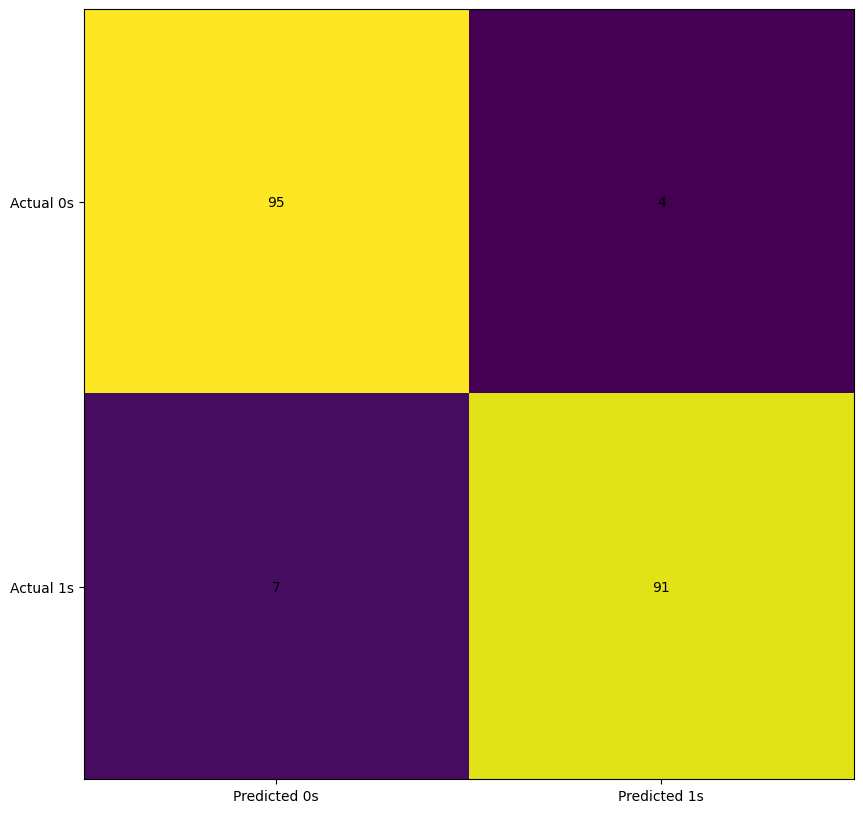

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha= 'center', va='center', color='black')
plt.show()

End of code.